In [41]:
from os import listdir
from os.path import isfile, join
import json
import seaborn as sns
import pandas as pd

In [69]:
def process_json(json):
    if json["input"]["consensus"] != "HotStuff":
        json["input"]["consensus"] = "Jasmine"
    cate = json["input"]["consensus"] + str(json["input"]["node_settings"]["batch_size"]) + str(json["input"]["node_settings"]["transaction_size"]) + \
       str(json["input"]["node_settings"]["leader_rotation"]) + \
       str(len(json["input"]["peer_addrs"]))
    row = {
        "cate": [cate],
        "consensus-latency":[json["output"]["average_delay"]],
        "rate" : json["input"]["client"]["injection_rate"],
        "latency": [json["output"]["e2e_delay"]],
        "throughput": [json["output"]["consensus_throughput"]],
    }
    return pd.DataFrame(row)


<AxesSubplot:xlabel='throughput', ylabel='latency'>

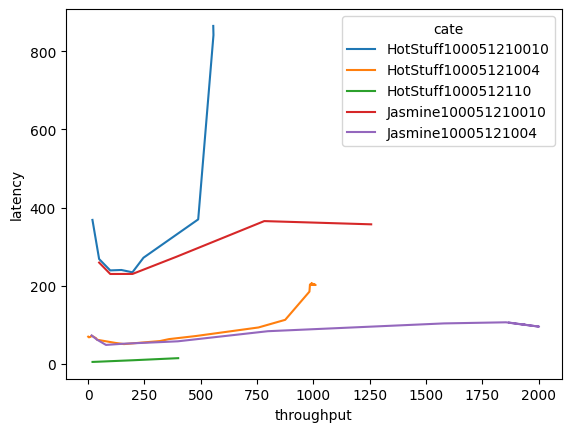

In [82]:
mypath = "./1-plan"
fs = [f for f in listdir(mypath) if isfile(join(mypath, f))]
fs = [join(mypath, f) for f in fs if f.startswith('result')]
fs
df = pd.DataFrame()

for f in fs:
    with open(f) as file:
        data = json.load(file)
    r = process_json(data)
    df = pd.concat([df, r])

df = df.sort_values(by=["cate", "rate"])
# df

# Plot the lines on two facets
# Define the palette as a list to specify exact values

sns.lineplot(
    data=df,
    x="throughput", y="latency",sort=False,
    hue="cate",
)

<AxesSubplot:xlabel='throughput', ylabel='latency'>

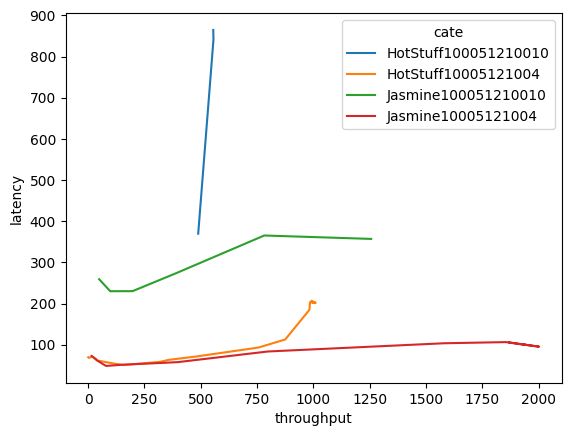